<h1>Hand On Exam</h1>
<hr>
<h3>TRISH-ANNE P. HUIDEM</h3>
<h3>BSIT-3B</h3>

<h6>
<strong>Data Visualization: Provide Visualization each Insights.</strong>
</h6>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import seaborn as sns

In [2]:
crimes = pd.read_csv('Datasets\\chicago_2001_present.csv')

In [3]:
crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13311263,JG503434,07/29/2022 03:39:00 AM,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,...,25.0,30.0,17,NaN,NaN,2022,04/18/2024 03:40:59 PM,NaN,NaN,NaN
1,13053066,JG103252,01/03/2023 04:44:00 PM,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,...,28.0,26.0,18,NaN,NaN,2023,01/20/2024 03:41:12 PM,NaN,NaN,NaN
2,12131221,JD327000,08/10/2020 09:45:00 AM,015XX N DAMEN AVE,0326,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,True,False,...,1.0,24.0,03,1162795.0,1909900.0,2020,05/17/2025 03:40:52 PM,41.908418,-87.677407,"(41.908417822, -87.67740693)"
3,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410193,13973682,JJ422722,09/20/2025 09:30:00 PM,060XX N ARTESIAN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,40.0,2.0,07,1158892.0,1940132.0,2025,09/28/2025 03:42:59 PM,41.991457,-87.690912,"(41.99145724, -87.690912186)"
8410194,13973492,JJ422488,09/20/2025 11:30:00 PM,004XX N PEORIA ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,27.0,24.0,07,1170336.0,1902935.0,2025,09/28/2025 03:42:59 PM,41.889144,-87.649909,"(41.889143855, -87.649909004)"
8410195,13973306,JJ422245,09/20/2025 07:08:00 PM,107XX S PRAIRIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,True,...,9.0,49.0,08A,1179819.0,1833810.0,2025,09/28/2025 03:42:59 PM,41.699246,-87.617199,"(41.699245987, -87.61719874)"
8410196,13973002,JJ422001,09/20/2025 03:55:00 PM,034XX W 63RD ST,2024,NARCOTICS,POSSESS - HEROIN (WHITE),POLICE FACILITY / VEHICLE PARKING LOT,True,False,...,14.0,66.0,18,1154582.0,1862632.0,2025,09/28/2025 03:42:59 PM,41.778877,-87.708840,"(41.778877155, -87.708840106)"


In [4]:
crimes.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     14893
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614822
Community Area          613687
FBI Code                     0
X Coordinate             93685
Y Coordinate             93685
Year                         0
Updated On                   0
Latitude                 93685
Longitude                93685
Location                 93685
dtype: int64

In [5]:
crimes.info

<bound method DataFrame.info of                ID Case Number                    Date  \
0        13311263    JG503434  07/29/2022 03:39:00 AM   
1        13053066    JG103252  01/03/2023 04:44:00 PM   
2        12131221    JD327000  08/10/2020 09:45:00 AM   
3        11227634    JB147599  08/26/2017 10:00:00 AM   
4        13203321    JG415333  09/06/2023 05:00:00 PM   
...           ...         ...                     ...   
8410193  13973682    JJ422722  09/20/2025 09:30:00 PM   
8410194  13973492    JJ422488  09/20/2025 11:30:00 PM   
8410195  13973306    JJ422245  09/20/2025 07:08:00 PM   
8410196  13973002    JJ422001  09/20/2025 03:55:00 PM   
8410197  13972730    JJ421679  09/20/2025 08:20:00 AM   

                           Block  IUCR                Primary Type  \
0                023XX S TROY ST  1582  OFFENSE INVOLVING CHILDREN   
1        039XX W WASHINGTON BLVD  2017                   NARCOTICS   
2              015XX N DAMEN AVE  0326                     ROBBERY   
3  

In [6]:
crimes['Date'] = crimes['Date'].astype(str)
crimes['Date'] = crimes['Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
crimes['Date'] = crimes['Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)                                
crimes['Date'] = pd.to_datetime(crimes['Date'], dayfirst=True, errors='coerce')

crimes.dtypes
crimes.isnull().sum()

crimes['Year'] = crimes['Date'].dt.year
crimes['Month'] =  crimes['Date'].dt.month
crimes['Day'] =  crimes['Date'].dt.day
crimes['DayOfWeek'] =  crimes['Date'].dt.dayofweek
crimes.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     14893
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614822
Community Area          613687
FBI Code                     0
X Coordinate             93685
Y Coordinate             93685
Year                         0
Updated On                   0
Latitude                 93685
Longitude                93685
Location                 93685
Month                        0
Day                          0
DayOfWeek                    0
dtype: int64

In [7]:
crimes['Date'] = crimes['Date'].astype('str')
crimes['Date'] = crimes['Date'].str.strip()
crimes['Date'] = crimes['Date'].str.replace('/', '-')

In [8]:
crimes['Date'] = pd.to_datetime(crimes['Date'], dayfirst = True, errors = 'coerce')

In [9]:
crimes.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int32
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Month                            int32
Day                              int32
DayOfWeek                        int32
dtype: object

<h1>INSIGHTS - 35</h1>

<h3>Question 1 - Do crimes spike during certain months (like summer vs winter?)</h3>

In [10]:
crimes['Month'] = crimes['Date'].dt.month
monthly_trends = crimes.groupby('Month').size().reset_index(name='Number of Crimes')
monthly_trends

,Month,Number of Crimes
0,1,661245
1,2,584438
2,3,691342
3,4,688252
4,5,748780
5,6,748862
6,7,787986
7,8,778827
8,9,727097
9,10,722062


<hr>
<h3>Question 2 - Which crimes are most likely to result in an arrest?</h3>

In [11]:
arrest_rate_by_type = crimes.groupby('Primary Type')['Arrest'].mean().reset_index()
arrest_rate_by_type.sort_values('Arrest', ascending=False).head(10)

,Primary Type,Arrest
10,DOMESTIC VIOLENCE,1.000000
25,PROSTITUTION,0.995583
19,NARCOTICS,0.993468
11,GAMBLING,0.992703
17,LIQUOR LAW VIOLATION,0.990115
26,PUBLIC INDECENCY,0.981395
4,CONCEALED CARRY LICENSE VIOLATION,0.965707
14,INTERFERENCE WITH PUBLIC OFFICER,0.916336
21,OBSCENITY,0.738947
33,WEAPONS VIOLATION,0.725967


<hr>
<h3>Question 3 - Which street blocks have the highest concentration of crimes?</h3>

In [12]:
top_blocks = crimes['Block'].value_counts().head(10).reset_index()
top_blocks.columns = ['Block', 'Number of Crimes']
top_blocks

,Block,Number of Crimes
0,100XX W OHARE ST,16939
1,001XX N STATE ST,16909
2,076XX S CICERO AVE,10788
3,0000X N STATE ST,10150
4,008XX N MICHIGAN AVE,9733
5,0000X W TERMINAL ST,7763
6,064XX S DR MARTIN LUTHER KING JR DR,6460
7,063XX S DR MARTIN LUTHER KING JR DR,5930
8,023XX S STATE ST,5340
9,001XX W 87TH ST,4935


<hr>
<h3>Question 4 - Which police districts report the highest number of arrests?</h3>

In [13]:
district_arrests = (crimes[crimes['Arrest'] == True].groupby('District').size().reset_index(name='Number of Arrests').sort_values('Number of Arrests', ascending=False).head(5))

district_arrests

,District,Number of Arrests
10,11.0,219302
13,15.0,134296
6,7.0,130255
22,25.0,124489
7,8.0,123331


<hr>
<h3>Question 5 - Has crime overall increased or decreased over the years?</h3>

In [14]:
crimes['Year'] = crimes['Date'].dt.year
yearly_crimes = crimes.groupby('Year').size().reset_index(name='Number of Crimes')
yearly_crimes = yearly_crimes.sort_values('Year')
yearly_crimes

,Year,Number of Crimes
0,2001,485954
1,2002,486830
2,2003,475996
3,2004,469439
4,2005,453785
5,2006,448198
6,2007,437105
7,2008,427211
8,2009,392859
9,2010,370555


<hr>
<h3>Question 6 - Which crime types are the least common?</h3>

In [15]:
least_crimes = (crimes['Primary Type'].value_counts().reset_index().tail(10))
least_crimes.columns = ['Primary Type', 'Number of Crimes']
least_crimes

,Primary Type,Number of Crimes
24,STALKING,6115
25,INTIMIDATION,5088
26,CONCEALED CARRY LICENSE VIOLATION,1633
27,OBSCENITY,950
28,PUBLIC INDECENCY,215
29,OTHER NARCOTIC VIOLATION,163
30,HUMAN TRAFFICKING,137
31,NON-CRIMINAL,26
32,RITUALISM,24
33,DOMESTIC VIOLENCE,1


<hr>
<h3>Question 7 - Where do stalking crimes most often occur in Chicago?</h3>

In [16]:
stalking_crimes = crimes[crimes['Primary Type'] == 'STALKING']
stalking_places = (stalking_crimes['Location Description'].value_counts().reset_index().head(10))
stalking_places.columns = ['Location', 'Number of Stalking Crimes']
stalking_places

,Location,Number of Stalking Crimes
0,RESIDENCE,1578
1,STREET,1356
2,APARTMENT,1257
3,SIDEWALK,397
4,OTHER,192
5,RESTAURANT,104
6,COMMERCIAL / BUSINESS OFFICE,97
7,RESIDENCE PORCH/HALLWAY,89
8,PARKING LOT/GARAGE(NON.RESID.),59
9,ALLEY,57


<hr>
<h3>Question 8 - Which blocks have the most stalking crimes with no arrests?</h3>

In [17]:
stalking_block = crimes[(crimes['Primary Type'] == 'STALKING') & (crimes['Arrest'] == False)]

stalking_block_counts = (stalking_block['Block'].value_counts().reset_index().head(10))
stalking_block_counts.columns = ['Block', 'Unsolved Stalking Cases']
stalking_block_counts

,Block,Unsolved Stalking Cases
0,013XX S THROOP ST,14
1,019XX N OAK PARK AVE,11
2,100XX W OHARE ST,11
3,007XX E 111TH ST,9
4,021XX N MAJOR AVE,9
5,001XX N STATE ST,8
6,032XX W POLK ST,8
7,029XX S DEARBORN ST,6
8,012XX W ELMDALE AVE,6
9,032XX W LAWRENCE AVE,6


<hr>
<h3>Question 9 - Do the police always catch robbers?</h3>

In [18]:
robberies = crimes[crimes['Primary Type'] == 'ROBBERY']
robbery_outcomes = robberies['Arrest'].value_counts().reset_index()
robbery_outcomes.columns = ['Arrest Made', 'Number of Cases']
robbery_outcomes

,Arrest Made,Number of Cases
0,False,285202
1,True,29084


<hr>
<h3>Question 10 - What kinds of stealing-related crimes happen most often?</h3>

In [19]:
theft_count = crimes[crimes['Primary Type'] == 'THEFT'].shape[0]
robbery_count = crimes[crimes['Primary Type'] == 'ROBBERY'].shape[0]
burglary_count = crimes[crimes['Primary Type'] == 'BURGLARY'].shape[0]
stealing_counts = pd.DataFrame({'Crime Type': ['THEFT', 'ROBBERY', 'BURGLARY'],'Number of Cases': [theft_count, robbery_count, burglary_count]})
stealing_counts

,Crime Type,Number of Cases
0,THEFT,1785150
1,ROBBERY,314286
2,BURGLARY,444757


<hr>
<h3>Question 11 - Among the top 5 crime categories, what share of reported cases ended in an arrest?</h3>

In [20]:
soft_colors = ["#FFB6C1", "#FF69B4", "#FFC0CB", "#FFDAB9", "#E6E6FA", "#FFFACD", "#D8BFD8", "#F5DEB3"]

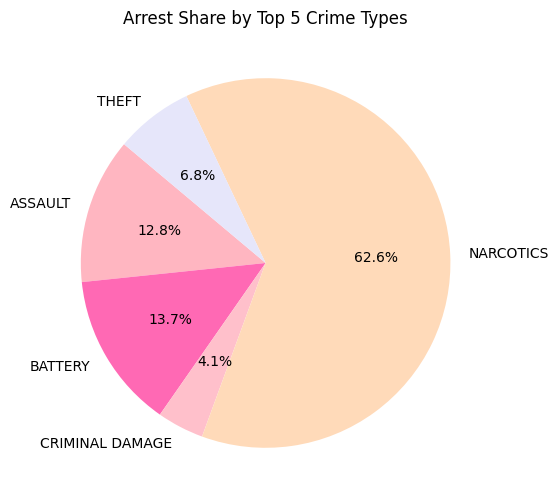

In [21]:
top5_types = crimes['Primary Type'].value_counts().head(5).index
arrest_share = crimes[crimes['Primary Type'].isin(top5_types)].groupby('Primary Type')['Arrest'].mean()

plt.figure(figsize=(6,6))
plt.pie(arrest_share, labels=arrest_share.index, autopct='%1.1f%%', startangle=140, colors=soft_colors)
plt.title("Arrest Share by Top 5 Crime Types")
plt.show()

<hr>
<h3>Question 12 - Where do most domestic crimes occur?</h3>

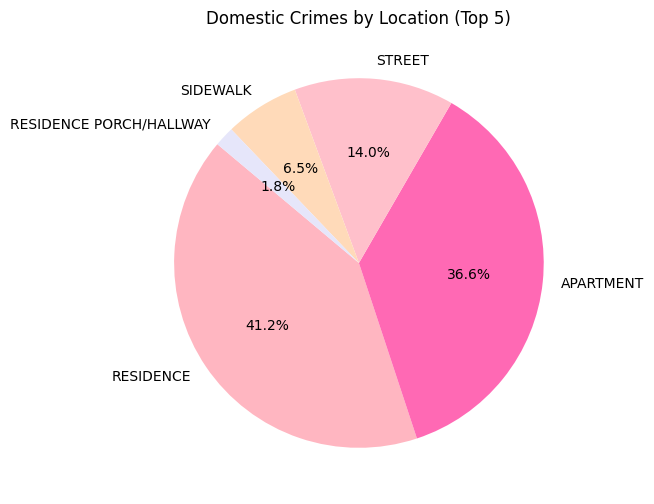

In [22]:
domestic_locations = crimes[crimes['Domestic'] == True].groupby('Location Description').size().nlargest(5)

plt.figure(figsize=(6,6))
plt.pie(domestic_locations, labels=domestic_locations.index, autopct='%1.1f%%', startangle=140, colors=soft_colors)
plt.title("Domestic Crimes by Location (Top 5)")
plt.show()

<hr>
<h3>Question 13 - What proportion of crimes happen in the morning, afternoon, evening, and night?</h3>

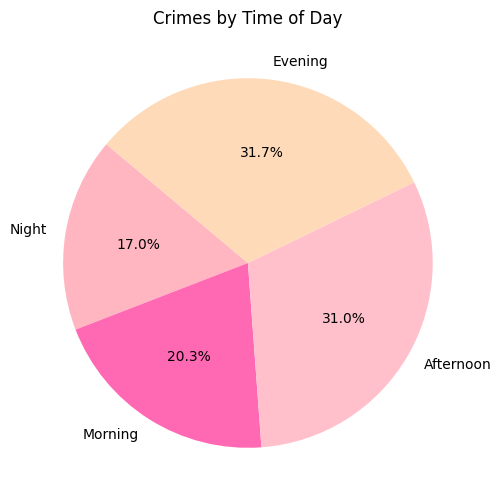

In [23]:
crimes['Hour'] = crimes['Date'].dt.hour
time_bins = pd.cut(crimes['Hour'], bins=[0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'], right=False)
time_share = time_bins.value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(time_share, labels=time_share.index, autopct='%1.1f%%', startangle=140, colors=soft_colors)
plt.title("Crimes by Time of Day")
plt.show()

<hr>
<h3>Question 14 - In latest year, what share of cases ended in arrests vs. no arrests?</h3>

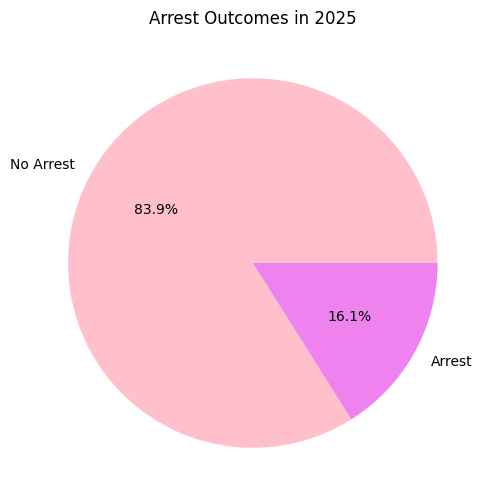

In [24]:
arrest_by_year = crimes.groupby([crimes['Date'].dt.year, 'Arrest']).size().unstack(fill_value=0)

latest_year = arrest_by_year.index.max()
arrest_share_year = arrest_by_year.loc[latest_year]

plt.figure(figsize=(6,6))
plt.pie(arrest_share_year, labels=['No Arrest','Arrest'], autopct='%1.1f%%', colors=['Pink','violet'])
plt.title(f"Arrest Outcomes in {latest_year}")
plt.show()

<hr>
<h3>Question 15 - For Theft cases only, what are the top 5 locations where they occur?</h3>

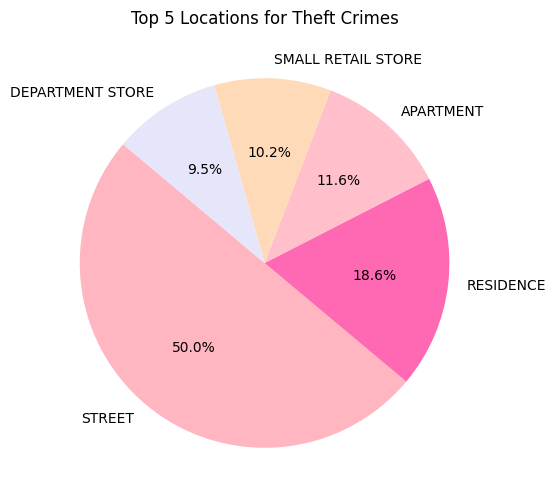

In [25]:
theft_locations = crimes[crimes['Primary Type'] == 'THEFT'].groupby('Location Description').size().nlargest(5)

plt.figure(figsize=(6,6))
plt.pie(theft_locations, labels=theft_locations.index, autopct='%1.1f%%', startangle=140, colors=soft_colors)
plt.title("Top 5 Locations for Theft Crimes")
plt.show()

<hr>
<h3>Question 16 - Which columns have the highest number of missing values?</h3>

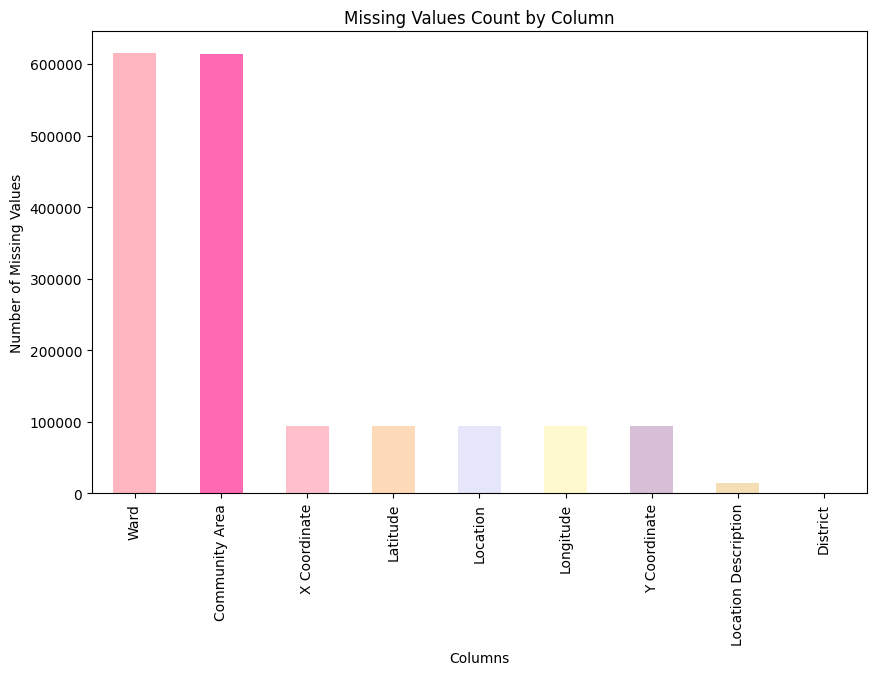

In [26]:
missing_counts = crimes.isnull().sum().sort_values(ascending=False)
missing_counts = missing_counts[missing_counts > 0]

plt.figure(figsize=(10,6))
missing_counts.plot(kind='bar', color=soft_colors)
plt.title("Missing Values Count by Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

<hr>
<h3>Question 17 - Are arrests more common in records with a valid Location Description compared to those with missing ones?</h3>

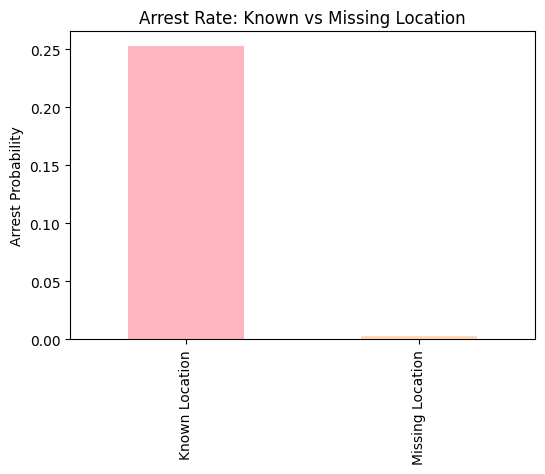

In [27]:
arrest_location = crimes.groupby(crimes['Location Description'].isnull())['Arrest'].mean()

arrest_location.index = ['Known Location','Missing Location']

arrest_location.plot(kind='bar', color=["#FFB6C1","#FFDAB9"], figsize=(6,4))
plt.title("Arrest Rate: Known vs Missing Location")
plt.ylabel("Arrest Probability")
plt.show()

<hr>
<h3>Question 18 - Do missing District values cluster in certain years?</h3>

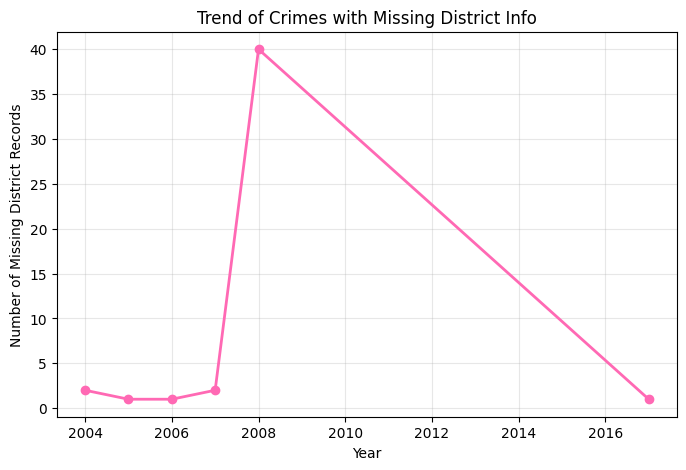

In [28]:
missing_district_trend = crimes[crimes['District'].isnull()].groupby('Year').size()

missing_district_trend.plot(marker='o', color="#FF69B4", linewidth=2, figsize=(8,5))
plt.title("Trend of Crimes with Missing District Info")
plt.ylabel("Number of Missing District Records")
plt.grid(alpha=0.3)
plt.show()

<hr>
<h3>Question 19 - What’s the difference in arrest rates between crimes with valid coordinates vs missing ones?</h3>

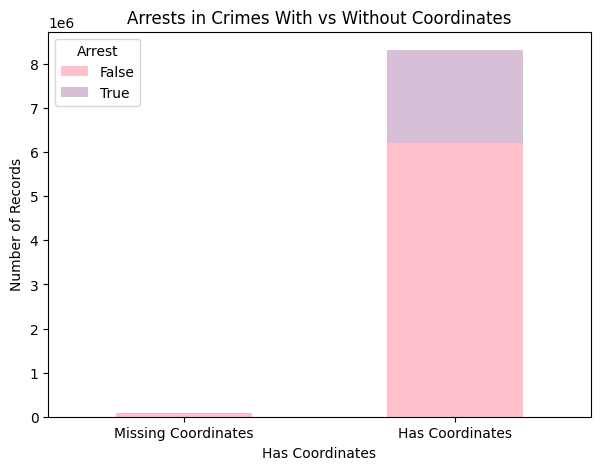

In [29]:
crimes['Has Coordinates'] = crimes['Latitude'].notnull()
coord_arrest = crimes.groupby('Has Coordinates')['Arrest'].value_counts().unstack().fillna(0)

coord_arrest.plot(kind='bar', stacked=True, figsize=(7,5), color=["#FFC0CB","#D8BFD8"])
plt.title("Arrests in Crimes With vs Without Coordinates")
plt.ylabel("Number of Records")
plt.xticks([0,1], ["Missing Coordinates","Has Coordinates"], rotation=0)
plt.show()

<hr>
<h3>Question 20 - Which top crimes are most often missing Ward data?</h3>

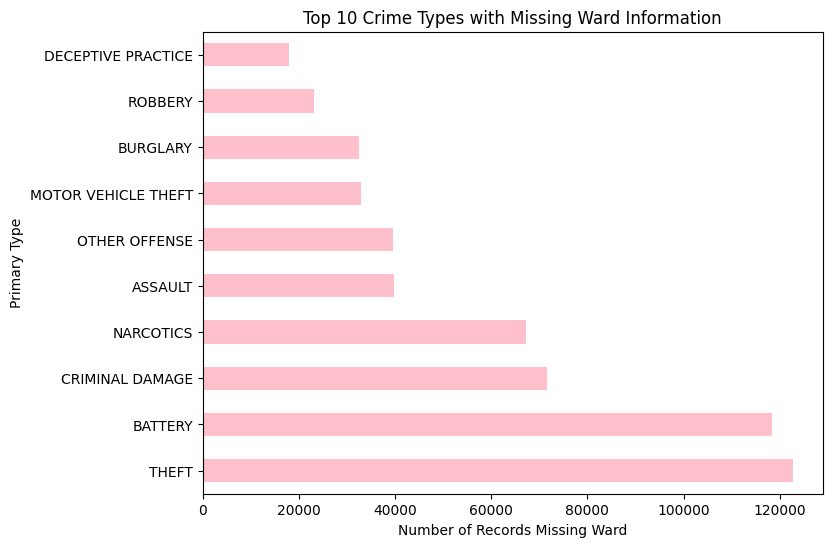

In [30]:
ward_missing_types = crimes[crimes['Ward'].isnull()]['Primary Type'].value_counts().head(10)

ward_missing_types.plot(kind='barh', color="pink", figsize=(8,6))
plt.title("Top 10 Crime Types with Missing Ward Information")
plt.xlabel("Number of Records Missing Ward")
plt.show()

<hr>
<h3>Question 21 - In what ways have crimes in Block 060XX N ARTESIAN AVE increased or decreased over the Month of 2001–2025?</h3>

In [31]:
N_ARTESIAN_AVE_crimes = crimes[crimes['Block'] == '060XX N ARTESIAN AVE']

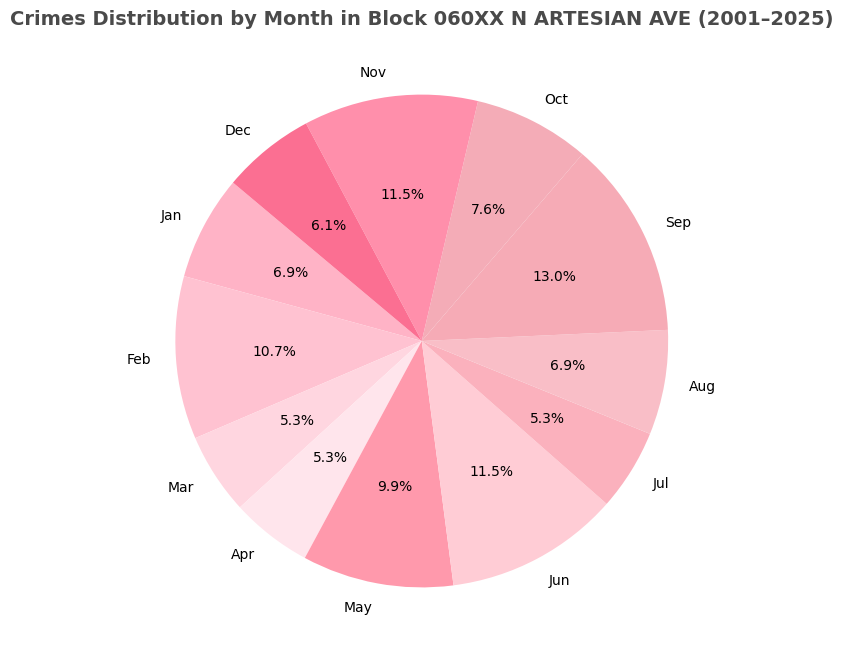

In [32]:
monthly_totals = N_ARTESIAN_AVE_crimes.groupby('Month').size()

month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_totals.index = monthly_totals.index.map(lambda x: month_names[x-1])

# Soft pink shades
pink_colors = [
    '#ffb3c6', '#ffc2d1', '#ffd6e0', '#ffe5ec',
    '#ff99ac', '#ffccd5', '#fbb1bd', '#f9bec7',
    '#f6abb6', '#f4acb7', '#ff8fab', '#fb6f92'
]

plt.figure(figsize=(8,8))
plt.pie(
    monthly_totals,
    labels=monthly_totals.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=pink_colors
)

plt.title('Crimes Distribution by Month in Block 060XX N ARTESIAN AVE (2001–2025)', 
          fontsize=14, weight='bold', color='#4a4a4a')
plt.show()

In [33]:
N_ARTESIAN_AVE_crimes = N_ARTESIAN_AVE_crimes.dropna(subset=['Latitude','Longitude'])

locations = list(zip(N_ARTESIAN_AVE_crimes['Latitude'], N_ARTESIAN_AVE_crimes['Longitude']))

m = folium.Map(location=[N_ARTESIAN_AVE_crimes['Latitude'].mean(), N_ARTESIAN_AVE_crimes['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m)

m.save('crime_heatmap.html')
m

<hr>
<h3>Question 22 - How have crime trends in Block 004XX N PEORIA ST shifted across the months from 2001 to 2025?</h3>

In [34]:
N_PEORIA_ST_crimes = crimes[crimes['Block'] == '004XX N PEORIA ST']

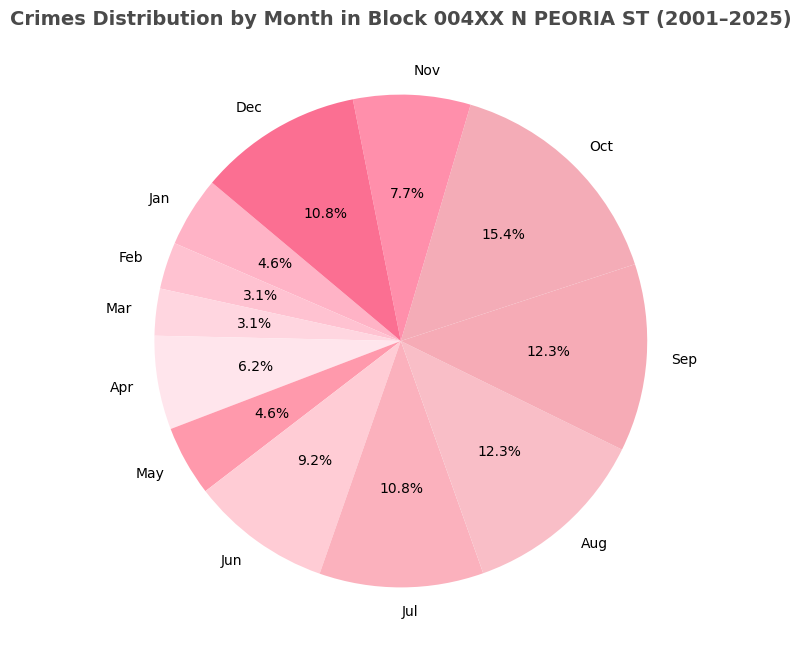

In [35]:
monthly_totals = N_PEORIA_ST_crimes.groupby('Month').size()

month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_totals.index = monthly_totals.index.map(lambda x: month_names[x-1])

# Soft pink shades
pink_colors = [
    '#ffb3c6', '#ffc2d1', '#ffd6e0', '#ffe5ec',
    '#ff99ac', '#ffccd5', '#fbb1bd', '#f9bec7',
    '#f6abb6', '#f4acb7', '#ff8fab', '#fb6f92'
]

plt.figure(figsize=(8,8))
plt.pie(
    monthly_totals,
    labels=monthly_totals.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=pink_colors
)

plt.title('Crimes Distribution by Month in Block 004XX N PEORIA ST (2001–2025)', 
          fontsize=14, weight='bold', color='#4a4a4a')
plt.show()

In [36]:
N_PEORIA_ST_crimes = N_PEORIA_ST_crimes.dropna(subset=['Latitude','Longitude'])

locations = list(zip(N_PEORIA_ST_crimes['Latitude'], N_PEORIA_ST_crimes['Longitude']))

m = folium.Map(location=[N_PEORIA_ST_crimes['Latitude'].mean(), N_PEORIA_ST_crimes['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m)

m.save('crime_heatmap.html')
m

<hr>
<h3>Question 23 - How have crime trends and patterns evolved in Block 107XX S PRAIRIE AVE from 2001 to 2025? </h3>

In [37]:
S_PRAIRIE_AVE_crimes = crimes[crimes['Block'] == '107XX S PRAIRIE AVE']

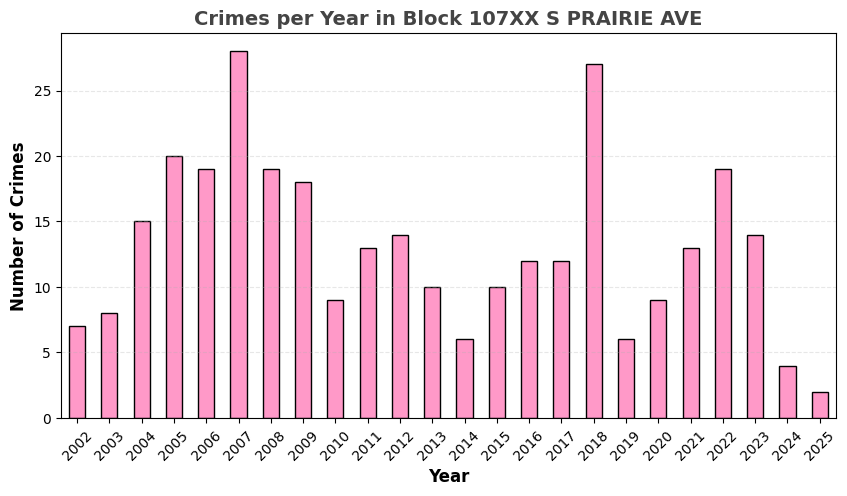

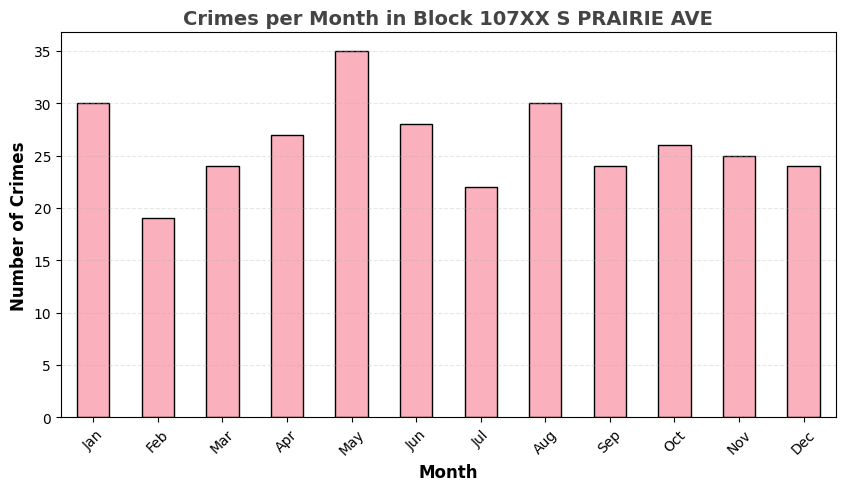

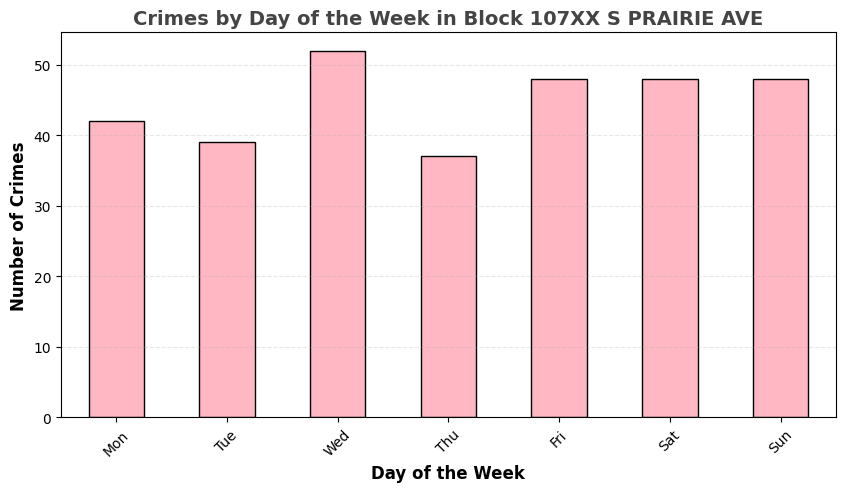

In [38]:
crimes_per_year = S_PRAIRIE_AVE_crimes['Year'].value_counts().sort_index()
crimes_per_month = S_PRAIRIE_AVE_crimes['Month'].value_counts().sort_index()
crimes_per_day = S_PRAIRIE_AVE_crimes['DayOfWeek'].value_counts().sort_index()

colors = ['#ff99c8', '#fbb1bd', '#ffb7c3']

plt.figure(figsize=(10,5))
crimes_per_year.plot(kind='bar', color=colors[0], edgecolor='black')
plt.title('Crimes per Year in Block 107XX S PRAIRIE AVE', fontsize=14, weight='bold', color='#444')
plt.xlabel('Year', fontsize=12, weight='bold')
plt.ylabel('Number of Crimes', fontsize=12, weight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.show()

month_names = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
               7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
crimes_per_month.index = crimes_per_month.index.map(month_names)

plt.figure(figsize=(10,5))
crimes_per_month.plot(kind='bar', color=colors[1], edgecolor='black')
plt.title('Crimes per Month in Block 107XX S PRAIRIE AVE', fontsize=14, weight='bold', color='#444')
plt.xlabel('Month', fontsize=12, weight='bold')
plt.ylabel('Number of Crimes', fontsize=12, weight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.show()

day_names = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
crimes_per_day.index = crimes_per_day.index.map(day_names)

plt.figure(figsize=(10,5))
crimes_per_day.plot(kind='bar', color=colors[2], edgecolor='black')
plt.title('Crimes by Day of the Week in Block 107XX S PRAIRIE AVE', fontsize=14, weight='bold', color='#444')
plt.xlabel('Day of the Week', fontsize=12, weight='bold')
plt.ylabel('Number of Crimes', fontsize=12, weight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.show()

In [39]:
S_PRAIRIE_AVE_crimes = S_PRAIRIE_AVE_crimes.dropna(subset=['Latitude','Longitude'])

locations = list(zip(S_PRAIRIE_AVE_crimes['Latitude'], S_PRAIRIE_AVE_crimes['Longitude']))

m = folium.Map(location=[S_PRAIRIE_AVE_crimes['Latitude'].mean(), S_PRAIRIE_AVE_crimes['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m)

m.save('crime_heatmap.html')
m

<hr>
<h3>Question 24 - How did the frequency and nature of crimes vary in Block 034XX W 63RD ST over the years 2001 to 2025? </h3>

In [40]:
W_STRD_ST_crimes = crimes[crimes['Block'] == '034XX W 63RD ST']

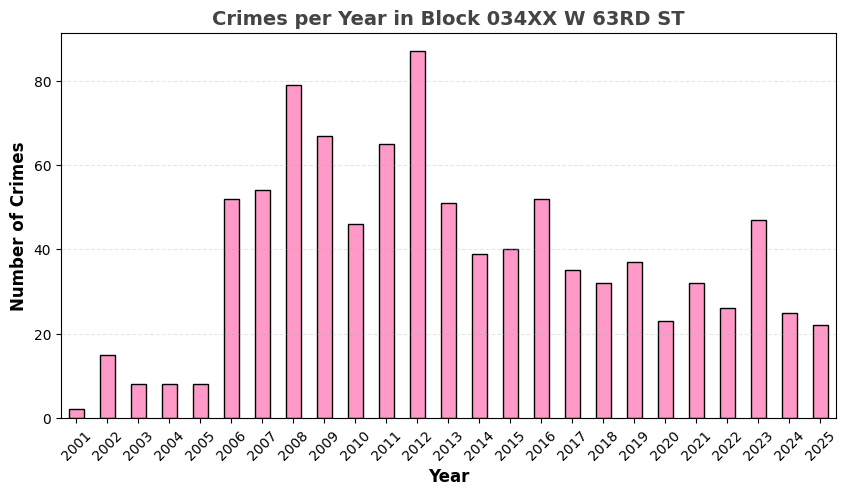

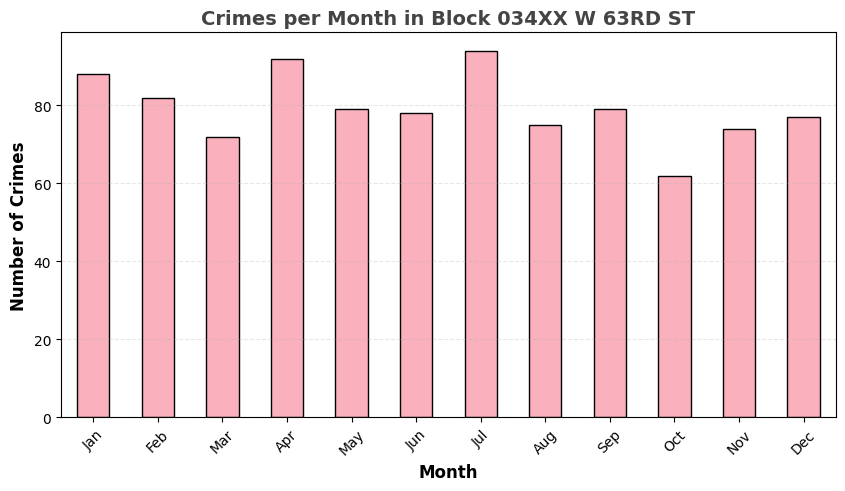

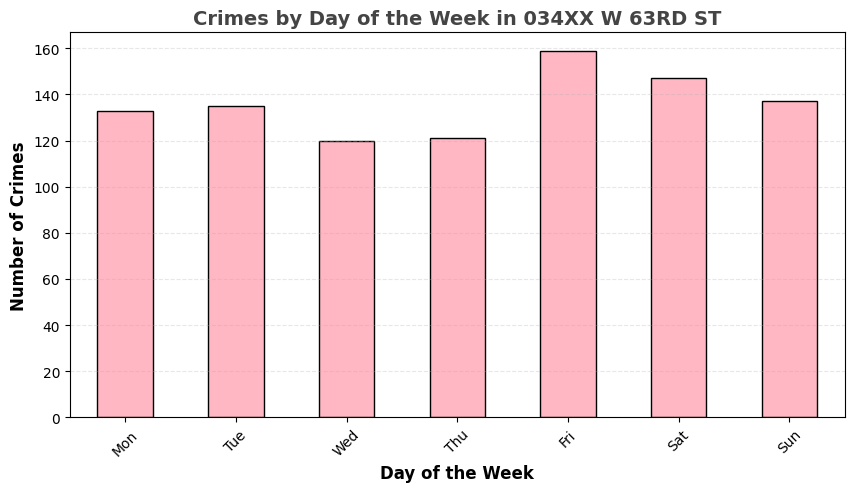

In [41]:
crimes_per_year = W_STRD_ST_crimes['Year'].value_counts().sort_index()
crimes_per_month = W_STRD_ST_crimes['Month'].value_counts().sort_index()
crimes_per_day = W_STRD_ST_crimes['DayOfWeek'].value_counts().sort_index()

colors = ['#ff99c8', '#fbb1bd', '#ffb7c3']

plt.figure(figsize=(10,5))
crimes_per_year.plot(kind='bar', color=colors[0], edgecolor='black')
plt.title('Crimes per Year in Block 034XX W 63RD ST', fontsize=14, weight='bold', color='#444')
plt.xlabel('Year', fontsize=12, weight='bold')
plt.ylabel('Number of Crimes', fontsize=12, weight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.show()

month_names = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
               7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
crimes_per_month.index = crimes_per_month.index.map(month_names)

plt.figure(figsize=(10,5))
crimes_per_month.plot(kind='bar', color=colors[1], edgecolor='black')
plt.title('Crimes per Month in Block 034XX W 63RD ST', fontsize=14, weight='bold', color='#444')
plt.xlabel('Month', fontsize=12, weight='bold')
plt.ylabel('Number of Crimes', fontsize=12, weight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.show()

day_names = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
crimes_per_day.index = crimes_per_day.index.map(day_names)

plt.figure(figsize=(10,5))
crimes_per_day.plot(kind='bar', color=colors[2], edgecolor='black')
plt.title('Crimes by Day of the Week in 034XX W 63RD ST', fontsize=14, weight='bold', color='#444')
plt.xlabel('Day of the Week', fontsize=12, weight='bold')
plt.ylabel('Number of Crimes', fontsize=12, weight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.show()

In [42]:
W_STRD_ST_crimes = W_STRD_ST_crimes.dropna(subset=['Latitude','Longitude'])

locations = list(zip(W_STRD_ST_crimes['Latitude'], W_STRD_ST_crimes['Longitude']))

m = folium.Map(location=[W_STRD_ST_crimes['Latitude'].mean(), W_STRD_ST_crimes['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m)

m.save('crime_heatmap.html')
m

<hr>
<h3>Question 25 - What developments in crime levels and patterns occurred in Block 087XX S BURLEY AVE throughout 2001–2025? </h3>

In [43]:
S_BURLEY_AVE_crimes = crimes[crimes['Block'] == '087XX S BURLEY AVE']

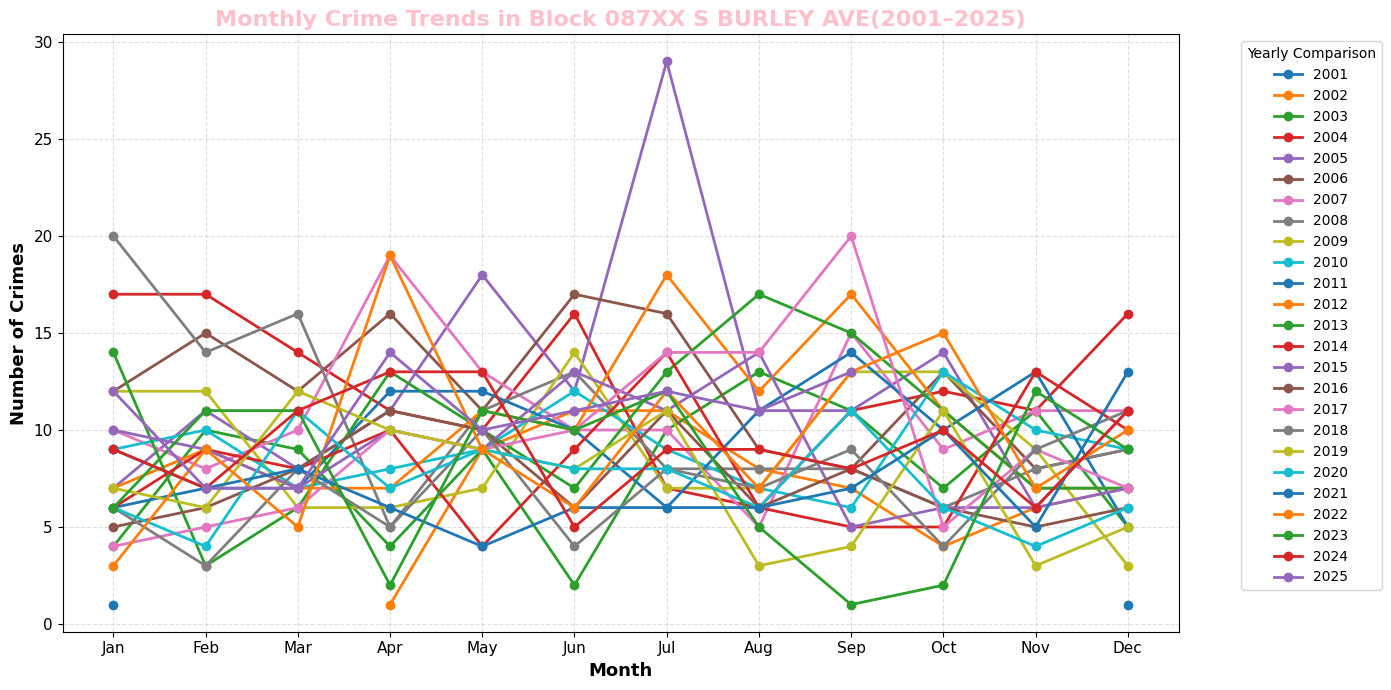

In [44]:
monthly_londondata = S_BURLEY_AVE_crimes.groupby(['Year', 'Month']).size()
monthly_londondata = monthly_londondata.unstack(level=0)

plt.figure(figsize=(14,7))
for col in monthly_londondata.columns:
    plt.plot(monthly_londondata.index, monthly_londondata[col],
             marker='o', linewidth=2, markersize=6, label=col)

plt.xticks(
    range(1, 13),
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    fontsize=11
)
plt.yticks(fontsize=11)

plt.title('Monthly Crime Trends in Block 087XX S BURLEY AVE(2001–2025)', 
          fontsize=16, weight='bold', color='pink')
plt.xlabel("Month", fontsize=13, weight='bold')
plt.ylabel("Number of Crimes", fontsize=13, weight='bold')

plt.legend(title='Yearly Comparison', bbox_to_anchor=(1.05,1), loc='upper left', fontsize=10)
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

In [45]:
S_BURLEY_AVE_crimes = S_BURLEY_AVE_crimes.dropna(subset=['Latitude','Longitude'])

locations = list(zip(S_BURLEY_AVE_crimes['Latitude'], S_BURLEY_AVE_crimes['Longitude']))

m = folium.Map(location=[S_BURLEY_AVE_crimes['Latitude'].mean(), S_BURLEY_AVE_crimes['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m)

m.save('crime_heatmap.html')
m

<hr>
<h3>Question 26 - What crimes happened in 2018 with missing Community Area? </h3>

In [46]:
crimes.loc[(crimes['Year'] == 2018) & (crimes['Community Area'].isna()), 
       ['Case Number', 'Date', 'Primary Type', 'Community Area']]

,Case Number,Date,Primary Type,Community Area
7094585,JE143107,2018-04-05 12:00:00,DECEPTIVE PRACTICE,NaN
7986829,JB147549,2018-01-25 18:00:00,THEFT,NaN
7986830,JB211497,2018-03-22 15:45:00,THEFT,NaN
7986831,JB226204,2018-04-15 17:30:00,THEFT,NaN
7986832,JB256063,2018-05-09 03:40:00,BATTERY,NaN
7986833,JB330933,2018-07-01 17:15:00,BATTERY,NaN
7986834,JB341586,2018-07-09 00:59:00,BATTERY,NaN
7986835,JB344205,2018-06-15 00:00:00,THEFT,NaN
7986836,JB369722,2018-07-28 18:30:00,OTHER OFFENSE,NaN
7986837,JB380175,2018-07-30 00:01:00,CRIMINAL DAMAGE,NaN


<hr>
<h3>Question 27 - What crimes happened in 2018 with missing Community Area? </h3>

In [47]:
crimes.loc[(crimes['District'] == 11) & (crimes['Arrest'] == True), 
       ['Case Number', 'Date', 'Primary Type', 'Block']]


,Case Number,Date,Primary Type,Block
1,JG103252,2023-01-03 16:44:00,NARCOTICS,039XX W WASHINGTON BLVD
36,JG161829,2019-08-17 13:14:00,OFFENSE INVOLVING CHILDREN,008XX N KARLOV AVE
89,JE366265,2021-09-08 16:45:00,HOMICIDE,047XX W HARRISON ST
133,JG414140,2023-09-06 19:05:00,NARCOTICS,0000X S KARLOV AVE
281,JG414080,2023-09-06 19:00:00,NARCOTICS,034XX W SCHRAEDER DR
...,...,...,...,...
8409870,JJ421659,2025-09-20 11:04:00,NARCOTICS,005XX S CALIFORNIA AVE
8409904,JJ421759,2025-09-20 11:24:00,WEAPONS VIOLATION,046XX W WASHINGTON BLVD
8409925,JJ422008,2025-09-20 15:44:00,NARCOTICS,037XX W CHICAGO AVE
8410168,JJ422269,2025-09-20 19:57:00,WEAPONS VIOLATION,005XX S PULASKI RD


<hr>
<h3>Question 28 - Show all HOMICIDE cases marked as Domestic? </h3>

In [48]:
crimes.loc[(crimes['Primary Type'] == 'HOMICIDE') & (crimes['Domestic'] == True), 
       ['Case Number', 'Date', 'Block', 'Description']]

,Case Number,Date,Block,Description
17,JH119907,2023-06-05 21:15:00,020XX N KIMBALL AVE,FIRST DEGREE MURDER
1835,JG380551,2023-08-16 21:13:00,063XX S MAY ST,FIRST DEGREE MURDER
2677,JG169965,2023-03-11 13:41:00,045XX S DREXEL BLVD,FIRST DEGREE MURDER
5110,JG421399,2023-09-12 14:51:00,052XX S KILDARE AVE,FIRST DEGREE MURDER
5763,JH116422,2024-01-15 16:30:00,048XX S ASHLAND AVE,FIRST DEGREE MURDER
...,...,...,...,...
8161542,JJ389673,2025-08-26 03:21:00,009XX W 78TH ST,FIRST DEGREE MURDER
8172350,JJ111772,2025-01-11 16:46:00,086XX S MUSKEGON AVE,FIRST DEGREE MURDER
8406512,JJ117733,2025-01-17 08:36:00,079XX S EAST END AVE,FIRST DEGREE MURDER
8409890,JJ335390,2025-07-15 17:08:00,026XX W ROOSEVELT RD,FIRST DEGREE MURDER


<hr>
<h3>Question 29 - Which crimes are missing both Latitude and Longitude? </h3>

In [49]:
crimes.loc[(crimes['Latitude'].isna()) & (crimes['Longitude'].isna()), 
       ['Case Number', 'Date', 'Primary Type', 'Block']]

,Case Number,Date,Primary Type,Block
0,JG503434,2022-07-29 03:39:00,OFFENSE INVOLVING CHILDREN,023XX S TROY ST
1,JG103252,2023-01-03 16:44:00,NARCOTICS,039XX W WASHINGTON BLVD
3,JB147599,2017-08-26 10:00:00,CRIM SEXUAL ASSAULT,001XX W RANDOLPH ST
24,JE293535,2020-10-01 00:01:00,OFFENSE INVOLVING CHILDREN,031XX W 53RD PL
25,JE439378,2015-09-24 00:00:00,OFFENSE INVOLVING CHILDREN,031XX W 53RD PL
...,...,...,...,...
8410137,JJ428951,2025-09-01 05:00:00,OTHER OFFENSE,116XX S JUSTINE ST
8410141,JJ430643,2025-08-20 22:00:00,THEFT,027XX W GLADYS AVE
8410165,JJ430753,2025-09-07 02:00:00,THEFT,007XX W BARRY AVE
8410182,JJ430249,2025-09-20 00:00:00,OFFENSE INVOLVING CHILDREN,082XX S LAFAYETTE AVE


<hr>
<h3>Question 30 - Which crimes were either THEFT or BURGLARY? </h3>

In [50]:
crimes.loc[crimes['Primary Type'].isin(['THEFT', 'BURGLARY']), 
       ['Case Number', 'Date', 'Primary Type', 'Block']]

,Case Number,Date,Primary Type,Block
5,JG416325,2023-09-06 11:00:00,THEFT,0000X E 8TH ST
6,JC272771,2019-05-21 08:20:00,BURGLARY,018XX S CALIFORNIA AVE
10,JG177593,2023-02-22 13:50:00,BURGLARY,070XX S CLYDE AVE
21,HP754070,2008-12-27 20:00:00,BURGLARY,058XX N MANTON AVE
50,JG386523,2023-08-17 15:15:00,THEFT,020XX N MILWAUKEE AVE
...,...,...,...,...
8410183,JJ422839,2025-09-20 10:12:00,THEFT,041XX S PULASKI RD
8410184,JJ421990,2025-09-20 15:00:00,BURGLARY,123XX S UNION AVE
8410186,JJ422402,2025-09-20 23:30:00,BURGLARY,024XX E 76TH ST
8410189,JJ430808,2025-09-20 16:00:00,THEFT,021XX W 19TH ST


<hr>
<h3>Question 31 - Show all crimes that occurred in Districts 7, 10, or 11? </h3>

In [51]:
crimes.loc[crimes['District'].isin([7, 10, 11]), 
       ['Case Number', 'Date', 'Primary Type', 'District']]

,Case Number,Date,Primary Type,District
0,JG503434,2022-07-29 03:39:00,OFFENSE INVOLVING CHILDREN,10.0
1,JG103252,2023-01-03 16:44:00,NARCOTICS,11.0
6,JC272771,2019-05-21 08:20:00,BURGLARY,10.0
11,JG246126,2023-05-03 08:10:00,BATTERY,7.0
28,JF113025,2022-01-14 15:55:00,OTHER OFFENSE,7.0
...,...,...,...,...
8410162,JJ421385,2025-09-20 04:15:00,OTHER OFFENSE,7.0
8410168,JJ422269,2025-09-20 19:57:00,WEAPONS VIOLATION,11.0
8410177,JJ421665,2025-09-20 11:15:00,ASSAULT,11.0
8410180,JJ421486,2025-09-20 08:00:00,BATTERY,11.0


<hr>
<h3>Question 32 - Which crimes happened in the blocks "001XX W RANDOLPH ST", "034XX W 63RD ST", or "107XX S PRAIRIE AVE"? </h3>

In [52]:
crimes.loc[crimes['Block'].isin(['001XX W RANDOLPH ST', '034XX W 63RD ST', '107XX S PRAIRIE AVE']), 
       ['Case Number', 'Date', 'Primary Type', 'Block']]

,Case Number,Date,Primary Type,Block
3,JB147599,2017-08-26 10:00:00,CRIM SEXUAL ASSAULT,001XX W RANDOLPH ST
146,JG413760,2023-09-06 13:30:00,ASSAULT,001XX W RANDOLPH ST
3100,JG417698,2023-09-09 14:45:00,CRIMINAL DAMAGE,001XX W RANDOLPH ST
3572,JG421061,2023-09-10 00:15:00,MOTOR VEHICLE THEFT,001XX W RANDOLPH ST
4507,JG420184,2023-09-11 15:20:00,PROSTITUTION,034XX W 63RD ST
...,...,...,...,...
8402742,HX486467,2014-10-29 09:15:00,PUBLIC PEACE VIOLATION,001XX W RANDOLPH ST
8403098,HX508070,2014-11-15 14:30:00,NARCOTICS,034XX W 63RD ST
8404091,HY101936,2015-01-02 18:00:00,OFFENSE INVOLVING CHILDREN,034XX W 63RD ST
8410195,JJ422245,2025-09-20 19:08:00,ASSAULT,107XX S PRAIRIE AVE


<hr>
<h3>Question 33 - Which crimes in 2021 had FBI Codes 06, 08B, or 13? </h3>

In [53]:
crimes.loc[(crimes['Year'] == 2021) & (crimes['FBI Code'].isin(['06', '08B', '13'])), 
       ['Case Number', 'Date', 'Primary Type', 'FBI Code']]

,Case Number,Date,Primary Type,FBI Code
2659,JE220723,2021-05-05 15:31:00,BATTERY,08B
2660,JE247919,2021-05-30 13:45:00,BATTERY,08B
2662,JE268784,2021-06-16 23:20:00,BATTERY,08B
2663,JE270001,2021-06-17 23:20:00,BATTERY,08B
2664,JE274272,2021-06-19 14:00:00,BATTERY,08B
...,...,...,...,...
8115582,JJ318341,2021-06-01 21:00:00,BATTERY,08B
8151094,JJ379668,2021-08-01 15:00:00,THEFT,06
8154029,JJ386446,2021-03-01 19:00:00,BATTERY,08B
8156774,JJ391776,2021-12-04 00:00:00,THEFT,06


<hr>
<h3>Question 34 - How many burglary crimes in Block 107XX S PRAIRIE AVE led to arrests in 2020? </h3>

In [54]:
burglary_prairie_2020 = crimes.loc[
    (crimes['Block'] == '107XX S PRAIRIE AVE') &
    (crimes['Primary Type'] == 'BURGLARY') &
    (crimes['Year'] == 2020) &
    (crimes['Arrest'] == True)
]

print("Number of burglary arrests in 2020 at 107XX S PRAIRIE AVE:", len(burglary_prairie_2020))

Number of burglary arrests in 2020 at 107XX S PRAIRIE AVE: 0


<hr>
<h3>Question 35 - Which areas within Chicago show the highest concentration of crimes between 2001 and 2025, according to the hotspot heatmap?  </h3>

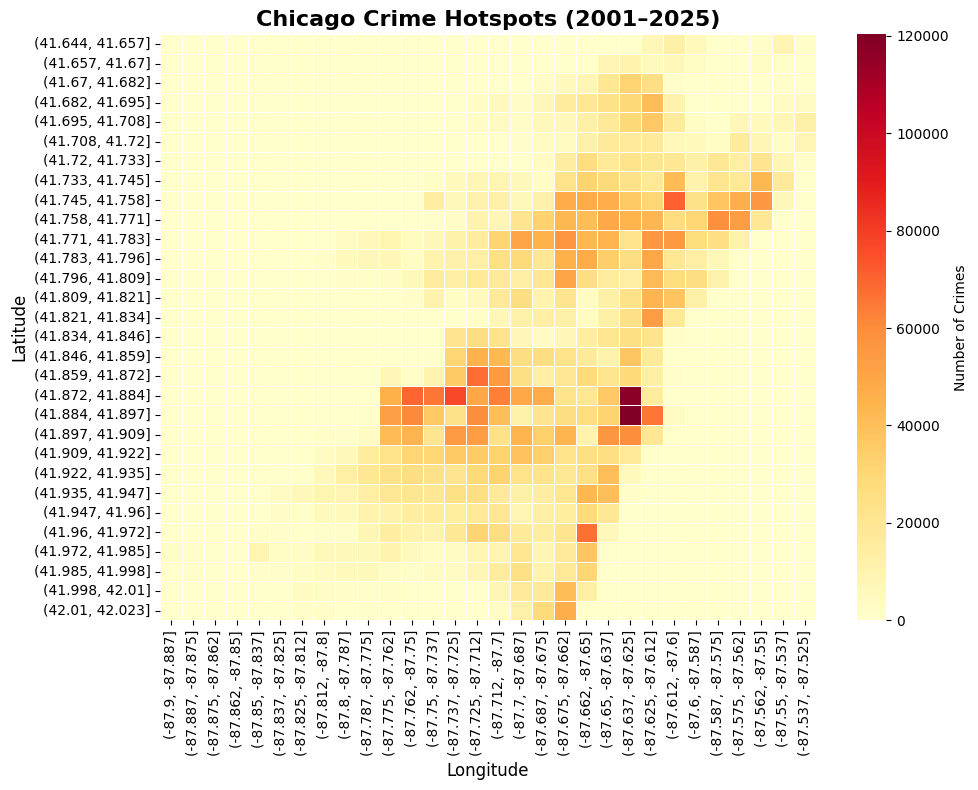

In [55]:
chicago_crimes = crimes[
    (crimes['Latitude'] > 41.6) & (crimes['Latitude'] < 42.1) & 
    (crimes['Longitude'] > -87.9) & (crimes['Longitude'] < -87.5)
]

heatmap_data = chicago_crimes.groupby(
    [pd.cut(chicago_crimes['Latitude'], 30), 
     pd.cut(chicago_crimes['Longitude'], 30)]
).size().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",  
    linewidths=0.5,
    cbar_kws={'label': 'Number of Crimes'}
)

plt.title('Chicago Crime Hotspots (2001–2025)', fontsize=16, weight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()
plt.show()